## Time-Frequency Analysis: Power Spectrum

Materials are based on [Neural Signal Processing (UCSD COGS118C)](https://github.com/rdgao/COGS118C) by Richard Gao (see the [LICENSE](https://github.com/rdgao/COGS118C/blob/master/LICENSE)).

In [ ]:
# make the imports
import numpy as np
from scipy import io, signal
import bokeh, bokeh.io, bokeh.plotting # specjalne wykresy
bokeh.io.output_notebook()

### Load the sample signal

First, we will load the same dataset as in the ADC lab.

In [ ]:
# Download the dataset (to Virtual Machine local filesystem)
# note the leading !. This is a signal to execute the line as a shell command
!wget https://krzysztof.kutt.pl/didactics/psaw/EEG_exp.mat

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# io.loadmat - pobieramy plik matlaba z danymi
# otrzymujemy slownik z nazwami zmiennych jako klucze
# oraz zaladowane macierze jako wartosci
# 

EEG_data = io.loadmat('EEG_exp.mat', squeeze_me = True)

# Nasz slownik
# print(EEG_data.keys())
# print(EEG_data.values())
# print(EEG_data.items())

df = pd.DataFrame.from_dict(EEG_data, orient='index')
df = df.transpose()

print(df.columns)
dane = df.head()


df1 = df.loc[:, ["EEG", "fs", "trial_info"]]



print(df.to_string())




In [ ]:

# Rozpakowywujemy zmienne



EEG = EEG_data['EEG']           # dane EEG
fs = EEG_data['fs']             # sampling rate - czestotliwosc probkowania
print(f'Sampling rate = {fs} Hz')

t_EEG = np.arange(0, len(EEG)/fs, 1/fs) # stworz odpowiedni wektor czasu
# tworzy tablice numpy od zera do len(EEG)/fs, postepujaca co 1/fs ...

# tworzymy wykres pierwszej czesci danych - jak widzimy dane wachaja sie w przedziale
#  [-13,15] mikro Voltow - ludzki mozg wytwarza sygnaly o amplitudzie 10 do maksymalnie 100 mikrowoltow
# 

bf = bokeh.plotting.figure(
    x_axis_label='Time (s)',
    y_axis_label='Voltage (uV)',
    plot_width=900,
    plot_height=250)
bf.line(t_EEG, EEG)
bf.x_range = bokeh.models.Range1d(0, 2)

bokeh.plotting.show(bf)

### Fourier transform

Now, you will perform your first frequency analysis on real recordings.

Fourier Decomposition is a way to represent a signal as the summation of a number of cosine (real part) and sine (imaginary part) waves of different frequencies (for more details, see [An Interactive Guide To The Fourier Transform](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/) or [Chapter 8 from DSP Guide](http://www.dspguide.com/ch8.htm)).

In [ ]:
N = len(EEG)

freqs = np.fft.fftfreq(N,1/fs)

F_EEG_np = np.fft.fft(EEG)

# plotting code
bf = bokeh.plotting.figure(
    x_axis_label='Frequency (Hz)',
    y_axis_label='Amplitude (uV)',
    plot_width=900,
    plot_height=250)
bf.line(freqs, F_EEG_np.real,
        legend_label='FFT (real)',
        color='blue', line_alpha=0.5)
bf.line(freqs, F_EEG_np.imag,
        legend_label='FFT (imag)',
        color='red', line_alpha=0.5)

bokeh.plotting.show(bf)

The above two plots are the real and imaginary coefficients spectra. While looking at them is interesting, we are often interested in another spectrum, the **power spectrum** of a signal, which is the squared magnitude of the complex vector at every frequency. This representation tells us which components are the strongest (has the highest power) in our data.

Computing and looking at the power spectrum is one of the most common ways of characterizing signals, especially for identifying strong rhythmic components in the data (e.g., neural oscillations).

In [ ]:
np_power = np.abs(F_EEG_np)**2

bf = bokeh.plotting.figure(
    x_axis_label='Frequency (Hz)',
    y_axis_label='Power (uV^2)',
    plot_width=400,
    plot_height=400)

bf.line(freqs, np_power)
bf.x_range = bokeh.models.Range1d(0, 50)
bf.y_range = bokeh.models.Range1d(0, 2*(10**10))

bokeh.plotting.show(bf)

But... Looking at the Fourier transform or power spectrum is like averaging over all the pictures in a movie, or all the notes in a song. You know **what notes** are in the song, but **not when** they are played.

### Time and Frequency Resolution
At the heart of time-frequency analysis is the ability to resolve how frequencies change over time, whereas a single Fourier transform (or power spectrum) is unable to. Below, we will simulate a 20-second signal to analyze. It is done - simply run the cell to plot the data.

In [ ]:
T, fs = 20, 1000         # czas, czestotliwosc
t = np.arange(0,T,1/fs)  # punkty czasowe pomiarow sygnalu


# sumulacja sygnalu, dzialanie funkcji na podstawie dokumentacj
# zwraca: cos(phase + (pi/180)*phi) , definicje parametrow f0, t1, f1 :
'''
f0 typu float
Czestotliwosc (przykladowo Hz) w czasie t=0.

t1 typu float
Czas dla ktorego f1 jest okreslone.

f1 typu float
Czestotliwosc (przykladowo Hz) przebiegu w czasie t1.


'''

sig = signal.chirp(t, f0=10, t1=20,f1=30)

# Wykres Wygenerowanego sygnalu

bf = bokeh.plotting.figure(
    x_axis_label='Time (s)',
    y_axis_label='Voltage (V)',
    plot_width=900,
    plot_height=250)
bf.line(t, sig)
bf.x_range = bokeh.models.Range1d(0, 10)

bokeh.plotting.show(bf)

**Task 1:** Computing Power Spectrum  
1. Compute the power spectrum of the signal (store in variable `ps`), using its Fourier transform (`np.fft.fft`). Plot the power spectrum. Keep in mind, that **x-axis** is a **frequency** in **Hz** (you can use `np.fft.fftfreq`). The plot is already zoomed into 0-50Hz.
1. Comment on the frequency content of the signal based on the power spectrum (i.e., what frequencies are present and/or domninant).
1. Does what you see in the time-seres plot (above) match what you see in the power spectrum, in terms of frequency content? Feel free to manipulate the x-limits of the time series plot to explore.

In [ ]:
# Spectral Density dla EEG - czysto z pliku matlaba
ps2 =  np.abs(np.fft.fft(EEG))**2                        
N2 = len(EEG)
freqs2 = np.fft.fftfreq(N,1/fs)



# Spectral Density dla sygnalu otrzymanego przez signal.chirp
ps =  np.abs(np.fft.fft(sig))**2                        
N = len(sig)
freqs = np.fft.fftfreq(N,1/fs)


bf = bokeh.plotting.figure(
    x_axis_label='Frequency (Hz)',
    y_axis_label='Power (V^2)',
    plot_width=600,
    plot_height=400)
bf.line(freqs, ps, legend_label='sig', color='magenta')

bf.x_range = bokeh.models.Range1d(0, 100)

bokeh.plotting.show(bf)


# Komentarz 2: 
# Widzimy ze czestotliwosci znajduja sie mniej wiecej w zakresie [8 : 32] Hz


# Dominujace czestotliwosci odnotowano dla około 10 oraz 30 Hz
#

# Uzyta funkcja wywołuje FFT - Szybka Transformacje Fouriera na tablicy numpy
# Na podstawie Reprezentacji czasu przez funkcje trygonometryczne -
# mozemy wyznaczyc wielkosc skladowych czestotliwosci, przez modul liczb zespolonych
# wstawiajac do ponizszego wzoru


# DFT
w = np.fft.fft(sig)

freqs = np.fft.fftfreq(len(sig))

# Uzyskaj czestotliwosci zwiazane z wartosciami FFT 
# 
'''
for coef, freq in zip(w, freqs):
    if coef:
        print('{c:>6} * exp(2 pi i t * {f})'.format(c=coef,
                                                    f=freq))
'''
# Interpretacja wynikow:        
# https://www.gaussianwaves.com/2015/11/interpreting-fft-results-obtaining-magnitude-and-phase-information/


**Response (for Task 1, point 2):** `#_FILL_IN_YOUR_RESPONSE_HERE`

**Response (for Task 1, point 3):** `#_FILL_IN_YOUR_RESPONSE_HERE`

**Task 2:** Power spectrum for parts of the signal  
1. You'll be doing this a lot in the following section, so create a function that computes the power spectrum (`pwsp`) given a signal and it's sampling frequency, as well as returning the frequency axis (`freqs`).
2. Using your function, compute the power spectrum of the **first second** of the signal, i.e., where t=[0,1) (this notation means inclusive of t=0, and exclusive of t=1, i.e. t>=0 and t\<1.). Hint: this is the first 1000 points of the signal, since `fs=1000`.
3. Repeat the second point, but for the last second of the data. You can plot them on the same plot. **Remember to label your lines!**
4. Comment on the similarities and differences between the two power spectrum plotted for points 2 and 3, and your interpretation of this in terms of the frequency content. Compare this plot with the plot for Task 1 point 1, what are their similarities and differences?

In [ ]:
def compute_pwsp(sig, fs):
    pwsp =  np.abs(np.fft.fft(sig))**2
    freqs =  np.fft.fftfreq(sig.size, 1/fs)
    return pwsp, freqs
    
sig_first = sig[:1000]   # pierwsza sekunda sygnalu
sig_last = sig[-1000:]   # ostatnia sekunda sygnalu

pwsp_first, freqs_win = compute_pwsp(sig_first, fs)
pwsp_last, _ = compute_pwsp(sig_last, fs)

# Wykres

bf = bokeh.plotting.figure(
    x_axis_label='Frequency (Hz)',
    y_axis_label='Power (V^2)',
    plot_width=400,
    plot_height=400)
bf.line(freqs_win, pwsp_first,
        legend_label='Pierwsza Sekunda', color='olive',line_width=2)
bf.line(freqs_win, pwsp_last,
        legend_label='Ostatnia Sekunda', color='red', line_width=2)
bf.x_range = bokeh.models.Range1d(0,100)

bokeh.plotting.show(bf)


**Response (for Task 2, point 4):** `#_FILL_IN_YOUR_RESPONSE_HERE`

### Time-Varying Frequencies
*Time and Frequency Resolution* section should have demonstrated to you that simply taking a power spectrum is not sufficient for some signals. In particular, when a signal violates stationarity, it may have frequency content that changes over time. This is **important**, as most signals in nature are NOT stationary. It would be like taking an average of all the frames in a movie to see what the movie is about.

How do we overcome this? Using **Short Time Fourier Transforms (STFT)**. The principle behind this method is already demonstrated in the **Task 2**. Instead of taking one big Fourier transform across time, STFT takes snippets of the signal to measure its frequency content over time, giving us both frequency and time resolution (hence the name, time-frequency analysis). 

Instead of picking two arbitrary time windows, however, STFT does this more systematically. Specifically, it's parameterized by two additional parameters: window length (`len_win`), which corresponds to the length of the small window of data you want to compute over, and step length (`len_step`), which corresponds to how much you step forward to compute the FT of the next window. In the diagram below, `len_win=M`, and `len_step=R`. 

Instead of step length, some implementations use the parameter overlap length (`len_overlap`), which is how much the next window overlaps with the current one (`L` in diagram). This is simply the complement of `R`, i.e., `L = M-R`. This is what `scipy.signal.stft()` uses, so we will adopt that as well to minimize confusion.

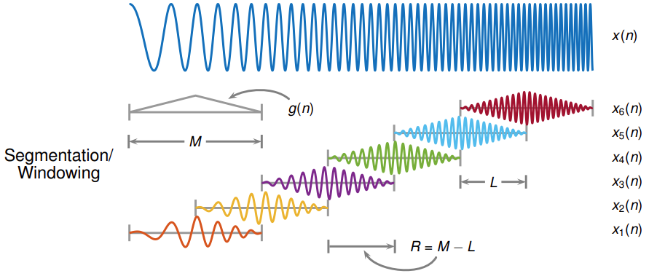

(Image from [MATLAB](https://www.mathworks.com/help/signal/ref/stft.html))

In [ ]:
# as there are no dedicated functions for plotting spectrograms in bokeh,
# we will use the ordinary matplotlib :)

import matplotlib.pyplot as plt

def plot_spectrogram(spg, t, f, freq_lims=[0,100], plot_db=False):
    """
    Utility function for plotting the spectrogram for you.
    
    spg: spectrogram, 2D real-numbered array, dimensions are [frequency x time]
    t: time axis of spectrogram
    f: frequency axis of spectrogram
    freq_lims (optional): limits the frequency axis, defaults to 0-100Hz
    """
    plt.figure(figsize=(15,4))
    if plot_db:
        plt.imshow(10*np.log10(spg), aspect='auto', extent=[t[0], t[-1], f[-1], f[0]])
    else:
        plt.imshow(spg, aspect='auto', extent=[t[0], t[-1], f[-1], f[0]])
    plt.xlabel('Time'); plt.ylabel('Frequency(Hz)');
    plt.ylim(freq_lims)
    plt.colorbar()
    plt.tight_layout()

'''


'''




In [ ]:
len_win = 1.
len_overlap = 0.5

f_sp, t_sp, spg_sp = signal.spectrogram(sig, fs, window='rect', nperseg=int(fs*len_win), noverlap=int(fs*len_overlap), detrend=False)
# plot spectrogram is defined above
plot_spectrogram(spg_sp, t_sp, f_sp, freq_lims=[0,50], plot_db=False)
plt.title('Spectrogram');

In the above cell, you can see a spectrogram. Take a closer look. Do you understand this type of plot?  
**Task 3:** Describe in your own words, what do you see on the plot? How it is related to the STFTs? How it is related to the signal from *Time and Frequency Resolution* section?

**Response (for Task 3):** `#_FILL_IN_YOUR_RESPONSE_HERE`


In [ ]:
# sygnal jest podzielony na 'porcje' , Wykres przedstawia przebieg "mocy" sygnalu w czasie.
# Wzmocnienia sygnalu sa oznaczane innymi kartonikami- ktore reprezentuja zachowanie sygnalu w odcinkach czasu.
# Wieksze zakresy czestotliwosc na spektrogramie - oznaczone szerszymi niebieskimi prostakatami wskazuja na 
# wieksze moce sygnalu.


# Spektrogram wydaje sie podobny zachowniem do 
# narzedzi z dokumentacji mathworks (matlab) - dzieki dokladnemu opisowi tego narzedzia
# mozemy zapisac obserwacje - ze notacja zastosowana w matlabie niebieskim oznacza wieksza moc sygnalu.
# Na naszym wykresie wartosci liczbowe rosna odwrotnie. Wiec mozna przypuszczac ze - uzyto odwrotnej palety kolorow.
# Brakuje wiekszej ilosci danych o sygnale.


# Popularne strony z wieloma Spektrogramami:
# https://www.mathworks.com/help/signal/ref/pspectrum.html
# https://en.wikipedia.org/wiki/Short-time_Fourier_transform



# Podsumowuwujac na wykresie - Spektrogramie - Widzimy STFT - gdzie zolte odcinki oznaczaja wieksza moc sygnalu.
# Czestotliwosc rosnie liniowo. 




